### Data  Example <a id="data"></a>

In [1]:
import numpy as np
np.random.seed(123)

# XOR dataset
n_samples = 1000
mu, sigma = 2, 3
X = sigma * np.random.randn(n_samples, 2) + mu
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0).astype(int)

print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (1000, 2)
y shape: (1000,)


Plotting the data.

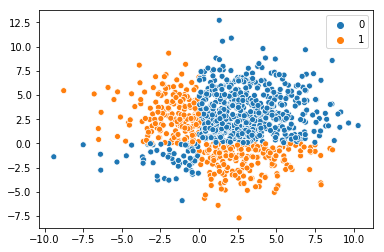

In [17]:
import seaborn as sns
sns.scatterplot(X[:,0],X[:,1],y)
#plt.xlabel("$x_1$", fontsize=14)
#plt.ylabel("$x_2$", rotation=0, fontsize=14)
#plt.title('Scatter plot of data')
#plt.legend(loc="upper left")
plt.show()

### Data Preparation <a id="data_prep"></a>

Splitting the data in a stratified fashion into training set with 80% of the samples and test set with the remaining 20%.

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =  train_test_split(X,y, test_size=0.2,random_state=0, stratify=y)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (800, 2)
X_test shape: (200, 2)


Feature Transform  by scaling each feature to the range of [0, 1].

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Neural Networks from Scratch <a id="NN_scratch"></a>

In [5]:
d=np.random.rand(3,2)
X_train.shape

(800, 2)

In [6]:
d.shape

(3, 2)

Implementing a two layer neural network from scratch.

In [7]:
class Neural_Network:
    def __init__(self, n_x = 2, n_h = 3, n_y = 1, lr= 0.01, num_iter= 100):    
        self.W1 = np.random.randn(n_h,n_x)       # (n_h, n_x)
        self.b1 =np.random.randn(n_h,1)        # (n_h, 1)
        self.W2 = np.random.randn(n_y,n_h)     # (n_y, n_h)
        self.b2 =np.random.randn(n_y,1)        # (n_y, 1)
        self.output =  np.zeros((n_y,1))  # (n_y, 1)
        self.lr = lr
        self.num_iter = num_iter
        #self.W1=np.array(self.W1)
        #self.W2=np.array(self.W2)
        
    def sigmoid(self, t):
        import numpy as np
        return 1/(1+np.exp(-t))

    def sigmoid_derivative(self, t):
        #from sympy import Symbol
        #t=Symbol('t')
        #return self.sigmoid(t).diff(t)
        return self.sigmoid(t)*(1-self.sigmoid(t))
    
    def feedforward(self, X):
        
        self.Z1 = X.dot(self.W1.T) + self.b1.reshape(-1)
        self.A1 = self.sigmoid(self.Z1)
               
        self.Z2 = self.A1.dot(self.W2.T) + self.b2 .reshape(-1)   
        self.A2 = self.sigmoid(self.Z2)
        
        return self.A2
    
    def backpropagation(self, X, y):
        
        N = X.shape[0] # Number of examples
        #from sympy import Symbol
    
        dZ2 = self.A2-y.reshape(-1,1)
        
        self.dW2 = (dZ2.T.dot(self.A1))/N
        
        self.db2 = (np.sum(dZ2, axis =0, keepdims = True))/N
        
        dZ1 = (dZ2.dot(self.W2))*(self.sigmoid_derivative(self.Z1))
        
        self.dW1 = (1/N)*(dZ1.T).dot(X)
        self.db1 = (1/N) * np.sum(dZ1.T, axis =1, keepdims = True)


    def update_parameters(self):
        self.W1 -= self.lr* self.dW1
        self.b1 -= self.lr*self.db1
        self.W2 -= self.lr*self.dW2
        self.b2 -= self.lr*self.db2
                
    
    # Define the cross entropy loss
    def loss(self, y, y_hat):
        import numpy as np
        return (-y.dot(np.log(y_hat))-(1-y).dot(np.log(1-y_hat)))/X.shape[0]
        
    
    def fit(self, X, y):
        
        loss_history = []
        for iter in range(self.num_iter):
            
            # forward-propagation
            y_hat = self.feedforward(X)
            # loss
            loss_history.append(self.loss(y,y_hat))
            
            # backpropagation
            self.backpropagation(X,y)
            # update parameters
            self.update_parameters()
        return loss_history  
            
    # Calculate probability estimates
    def predict_prob(self, X):
        return self.feedforward(X)
    
    # Predict class labels for samples in X
    def predict(self, X):
        return self.predict_prob(X).round()

Accuracy over test set: 0.7


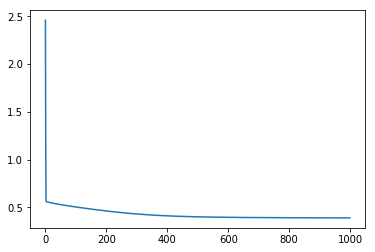

In [8]:
# Create an instance of the above class
lr = Neural_Network(n_x = 2, n_h = 20, lr= 0.5, num_iter= 1000)

# Fit the model over training set
J = lr.fit(X_train,y_train)

# Plot the loss vs iterations
import matplotlib.pyplot as plt
plt.plot(J)

# Make predictions over test set
y_test_pred = lr.predict(X_test)

# Measure accuracy over test set
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_pred,y_test)
print('Accuracy over test set:', accuracy)

### Neural Networks using SKlearn <a id="NN_sklearn"></a>

#### Model Training

In [19]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()

# Fit the data
mlp.fit(X_train,y_train)
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

#### Model Evaluation

Plotting loss over training iterations. 

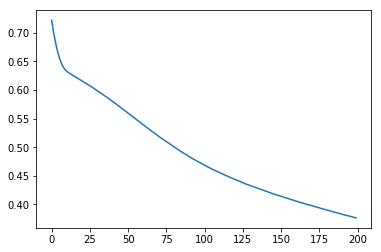

In [10]:
import matplotlib.pyplot as plt

plt.plot(mlp.loss_curve_)

#plt.plot(pose_mlp.loss_curve_)

Classification accuracy over the training/test sets.

In [11]:
from sklearn.metrics import accuracy_score

y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

print("Training Accuracy:", accuracy_score(y_train,y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test,y_test_pred) )

Training Accuracy: 0.86125
Testing Accuracy: 0.79


In [12]:
from sklearn.metrics import classification_report

report = classification_report(y_test,y_test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       125
           1       0.73      0.71      0.72        75

   micro avg       0.79      0.79      0.79       200
   macro avg       0.78      0.77      0.77       200
weighted avg       0.79      0.79      0.79       200



Text(33,0.5,'True class')

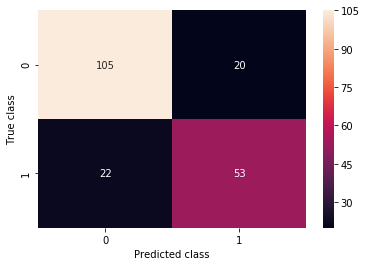

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(cm, annot = True, fmt = "d")
plt.xlabel("Predicted class")
plt.ylabel("True class")

#### Hyper-parameters Tuning

In [14]:
import warnings; warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV

param_grid = {'hidden_layer_sizes': [(10,), (50,), (10, 10)],
             'activation': ['tanh', 'relu'],
             'learning_rate': ['constant', 'adaptive'],
             'max_iter': [500]}

mlp = MLPClassifier()
gs = GridSearchCV(mlp, param_grid, cv = 5, verbose= 1)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   36.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'hidden_layer_sizes': [(10,), (50,), (10, 10)], 'activation': ['tanh', 'relu'], 'learning_rate': ['constant', 'adaptive'], 'max_iter': [500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [15]:
# Best parameters
print("The best parameters are:\n%s" % (gs.best_params_)) 

The best parameters are:
{'activation': 'relu', 'hidden_layer_sizes': (10, 10), 'learning_rate': 'adaptive', 'max_iter': 500}


In [20]:
y_train_pred = gs.predict(X_train)
y_test_pred = gs.predict(X_test)

print("Training Accuracy:", accuracy_score(y_train_pred, y_train))
print("Testing Accuracy:", accuracy_score(y_test_pred, y_test))

Training Accuracy: 0.9525
Testing Accuracy: 0.925
